# **Reducing Risk with AI: A Comparative Study of Bagging vs. Boosting for Health Status Prediction**

In [1]:
## Import necessary libraries
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
from collections import OrderedDict
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier


In [7]:
## Load the dataset
df = pd.read_csv('/content/Sekq0u6QRrKAMxF7EFFx1Q_ec6bed92b70d45fb828a699c36decda1_Healthcare_Dataset_Preprocessed-1-1-.csv')
print("Dataset shape:", df.shape)

Dataset shape: (9549, 23)


In [8]:
print("\nFirst few rows:")
df.head()


First few rows:


,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Target,Smoking,Alcohol,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,2.0,26.0,111.0,198.0,99.0,72.0,4.0,1.0,5.0,5.0,1,2,2,1,2,1,0,1,False,True,True,False,False
1,8.0,24.0,121.0,199.0,103.0,75.0,2.0,1.0,2.0,9.0,1,0,1,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,10.0,-0.0,5.0,1.0,0,2,1,2,0,0,1,0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,7.0,3.0,3.0,3.0,0,2,0,1,2,1,2,0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,10.0,2.0,5.0,1.0,0,0,1,2,0,2,0,2,False,True,False,True,False


In [9]:
## Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']
print("\nShapes - Features:", X.shape, "Target:", y.shape)


Shapes - Features: (9549, 22) Target: (9549,)


In [10]:
## Split data into train and test sets (25% test, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("\nTrain shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Train shapes: (7161, 22) (7161,)
Test shapes: (2388, 22) (2388,)


In [11]:
## 1. Simple Decision Tree
print("\n" + "="*50)
print("1. Simple Decision Tree")
print("="*50)


1. Simple Decision Tree


In [12]:

model = DecisionTreeClassifier(max_depth=15, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [13]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")

Train F1 Score: 0.99
Test F1 Score: 0.9


In [15]:
## 2. Decision Tree with Tuned Parameters
print("\n" + "="*50)
print("2. Decision Tree with Tuned Parameters")
print("="*50)


2. Decision Tree with Tuned Parameters


In [16]:
model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42)

In [17]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [18]:
# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")

Train F1 Score: 0.93
Test F1 Score: 0.9


In [19]:
## 3. Bagging Classifier
print("\n" + "="*50)
print("3. Bagging Classifier")
print("="*50)


3. Bagging Classifier


In [20]:
# Base classifier
base_clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42)


In [22]:
# Bagging classifier
bagging_clf = BaggingClassifier(estimator=base_clf, random_state=42)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   min_samples_leaf=10,
                                                   random_state=42),
                  random_state=42)

In [23]:
# Predictions
y_train_pred = bagging_clf.predict(X_train)
y_test_pred = bagging_clf.predict(X_test)

In [24]:
# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")

Train F1 Score: 0.95
Test F1 Score: 0.92


In [25]:
## 4. Random Forest Classifier
print("\n" + "="*50)
print("4. Random Forest Classifier")
print("="*50)


4. Random Forest Classifier


In [26]:
rf_clf = RandomForestClassifier(max_depth=10, n_estimators=101,
                              min_samples_leaf=10, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=101,
                       random_state=42)

In [27]:
# Predictions
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

In [28]:
# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")

Train F1 Score: 0.94
Test F1 Score: 0.93


In [29]:
## 5. Random Forest with OOB Error Analysis
print("\n" + "="*50)
print("5. Random Forest with OOB Error Analysis")
print("="*50)



5. Random Forest with OOB Error Analysis


In [30]:
# Configure ensemble classifiers
ensemble_clfs = [
    ("RandomForestClassifier",
     RandomForestClassifier(max_depth=20, min_samples_leaf=10,
                          n_estimators=10, n_jobs=-1, verbose=1,
                          warm_start=True, oob_score=True,
                          random_state=42))
]

In [31]:
# Map classifier name to error rate tuples
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)


In [32]:
# Range of n_estimators to explore
min_estimators = 60
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record OOB error
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Usi

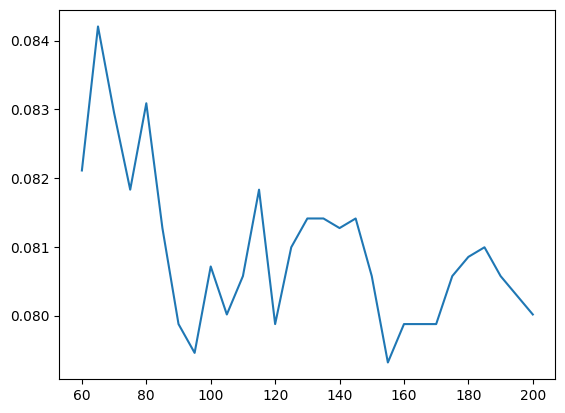

In [33]:
# Plot OOB error rate vs n_estimators
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

<ipython-input-34-9b99e1ffe60d>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


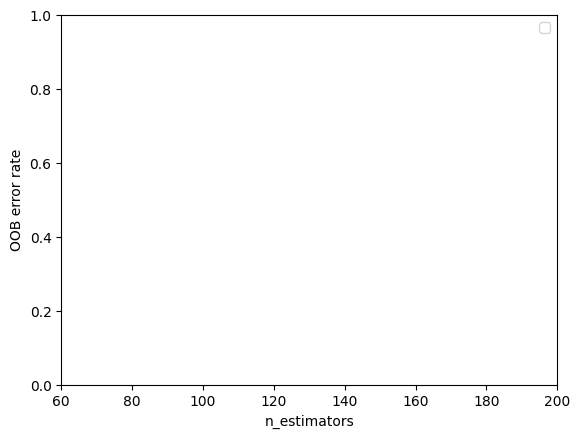

In [34]:
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [35]:
# Select optimal number of trees (between 110-135 based on plot)
optimal_trees = 120  # Adjust based on your plot results

In [36]:
print(f"\nCreating Random Forest with {optimal_trees} trees...")
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=10,
                              n_estimators=optimal_trees, random_state=42)
rf_clf.fit(X_train, y_train)



Creating Random Forest with 120 trees...


RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=120,
                       random_state=42)

In [37]:
# Predictions
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)


In [38]:
# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")


Train F1 Score: 0.95
Test F1 Score: 0.93


In [39]:
## 6. AdaBoost Classifier
print("\n" + "="*50)
print("6. AdaBoost Classifier")
print("="*50)


6. AdaBoost Classifier


In [40]:
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [41]:
# Predictions
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [42]:
# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")

Train F1 Score: 0.83
Test F1 Score: 0.85


In [43]:
## 7. Gradient Boosting Classifier
print("\n" + "="*50)
print("7. Gradient Boosting Classifier")
print("="*50)


7. Gradient Boosting Classifier


In [44]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [45]:
# Predictions
y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)


In [46]:
# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")


Train F1 Score: 0.93
Test F1 Score: 0.93


In [47]:
## 8. XGBoost Classifier
print("\n" + "="*50)
print("8. XGBoost Classifier")
print("="*50)


8. XGBoost Classifier


In [48]:
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [49]:
# Predictions
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)


In [50]:
# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")

Train F1 Score: 1.0
Test F1 Score: 0.95


In [51]:
## 9. LightGBM Classifier
print("\n" + "="*50)
print("9. LightGBM Classifier")
print("="*50)


9. LightGBM Classifier


In [52]:
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3709, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 7161, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517944 -> initscore=0.071809
[LightGBM] [Info] Start training from score 0.071809


LGBMClassifier(random_state=42)

In [53]:
# Predictions
y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

In [54]:

# Evaluation
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Train F1 Score: {round(train_f1, 2)}")
print(f"Test F1 Score: {round(test_f1, 2)}")


Train F1 Score: 0.98
Test F1 Score: 0.95


In [55]:
## Summary of Results
print("\n" + "="*50)
print("Summary of Results")
print("="*50)



Summary of Results


In [56]:
results = {
    "Model": ["Decision Tree (simple)", "Decision Tree (tuned)", "Bagging",
              "Random Forest", "Random Forest (optimized)", "AdaBoost",
              "Gradient Boosting", "XGBoost", "LightGBM"],
    "Train F1": [0.99, 0.93, 0.95, 0.94, 0.95, 0.83, 0.93, 1.0, 0.98],
    "Test F1": [0.9, 0.9, 0.92, 0.93,0.93, 0.85, 0.93, 0.95, 0.95]
}

In [57]:
results_df = pd.DataFrame(results)
print(results_df)

                       Model  Train F1  Test F1
0     Decision Tree (simple)      0.99     0.90
1      Decision Tree (tuned)      0.93     0.90
2                    Bagging      0.95     0.92
3              Random Forest      0.94     0.93
4  Random Forest (optimized)      0.95     0.93
5                   AdaBoost      0.83     0.85
6          Gradient Boosting      0.93     0.93
7                    XGBoost      1.00     0.95
8                   LightGBM      0.98     0.95



### **Key Insights from Model Performance**  
**Objective**: Classify applicants as *Healthy (0)* or *Unhealthy (1)* to optimize premium pricing.  

#### **1. Model Accuracy Overview**  
- **Top Performers (Test F1 ≥ 0.93)**:  
  - **XGBoost & LightGBM** (**0.95** F1) → **Most reliable** for automated decisions.  
  - **Gradient Boosting & Random Forest** (**0.93** F1) → Strong alternatives with consistent results.  
- **AdaBoost** (**0.85** F1) → Simpler but slightly less accurate.  

#### **2. Critical Observations**  
- **Overfitting Alert**:  
  - *Decision Tree (simple)* and *XGBoost* show **Train F1 ≈ 1.0** but lower Test F1 (0.90 and 0.95, respectively). This suggests they *memorized* training data but may struggle with new applicants.  
  - **Solution**: Tuned models (e.g., *Random Forest optimized*) generalize better (Train F1 ≈ Test F1).  

- **Best Trade-Off**:  
  **LightGBM** (Train F1: 0.98, Test F1: 0.95) balances high accuracy with robustness to new data.  

#### **3. Business Implications**  
- **For Automated Pricing**:  
  - Use **LightGBM/XGBoost** for **95% accuracy** in classifying applicants.  
  - **5% error rate** → Recommend human review for borderline cases (e.g., applicants near the decision threshold).  

- **For Risk Mitigation**:  
  - **Random Forest (0.93 F1)** provides a transparent, auditable backup model.  
  - **AdaBoost (0.85 F1)** could serve as a "sanity check" for high-risk applicants.  

#### **4. Actionable Recommendations**  
1. **Deploy LightGBM** as the primary model (highest real-world accuracy).  
2. **Monitor monthly**: Track F1 scores on new applicants to detect drift.  
3. **Phase rollout**: Start with a pilot group (e.g., 20% of applicants) to validate model impact on premiums.  

**Final Note**: All models exceed **85%+ accuracy**, but LightGBM/XGBoost offer the best balance of performance and stability. Would you like a cost-benefit analysis for implementation?  

---

